In [6]:
from glob import glob
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

# Endererço das imagens
img_names = glob(os.path.join(os.getcwd(),'Imagens', '*jpg'))
font = cv2.FONT_HERSHEY_SIMPLEX

In [7]:
print(f'imagens a serem analisadas: {img_names}') 

imagens a serem analisadas: ['C:\\Users\\engen\\Desktop\\cursos_visao_computacional\\visao_computacional_com_python_e_openCV\\8_segmentacao_de_objetos\\componentes_conectados\\componentes_conectados1_prof_felipe_meganha_udemy\\Imagens\\img01.jpg', 'C:\\Users\\engen\\Desktop\\cursos_visao_computacional\\visao_computacional_com_python_e_openCV\\8_segmentacao_de_objetos\\componentes_conectados\\componentes_conectados1_prof_felipe_meganha_udemy\\Imagens\\img02.jpg', 'C:\\Users\\engen\\Desktop\\cursos_visao_computacional\\visao_computacional_com_python_e_openCV\\8_segmentacao_de_objetos\\componentes_conectados\\componentes_conectados1_prof_felipe_meganha_udemy\\Imagens\\img03.jpg', 'C:\\Users\\engen\\Desktop\\cursos_visao_computacional\\visao_computacional_com_python_e_openCV\\8_segmentacao_de_objetos\\componentes_conectados\\componentes_conectados1_prof_felipe_meganha_udemy\\Imagens\\img04.JPG', 'C:\\Users\\engen\\Desktop\\cursos_visao_computacional\\visao_computacional_com_python_e_openCV

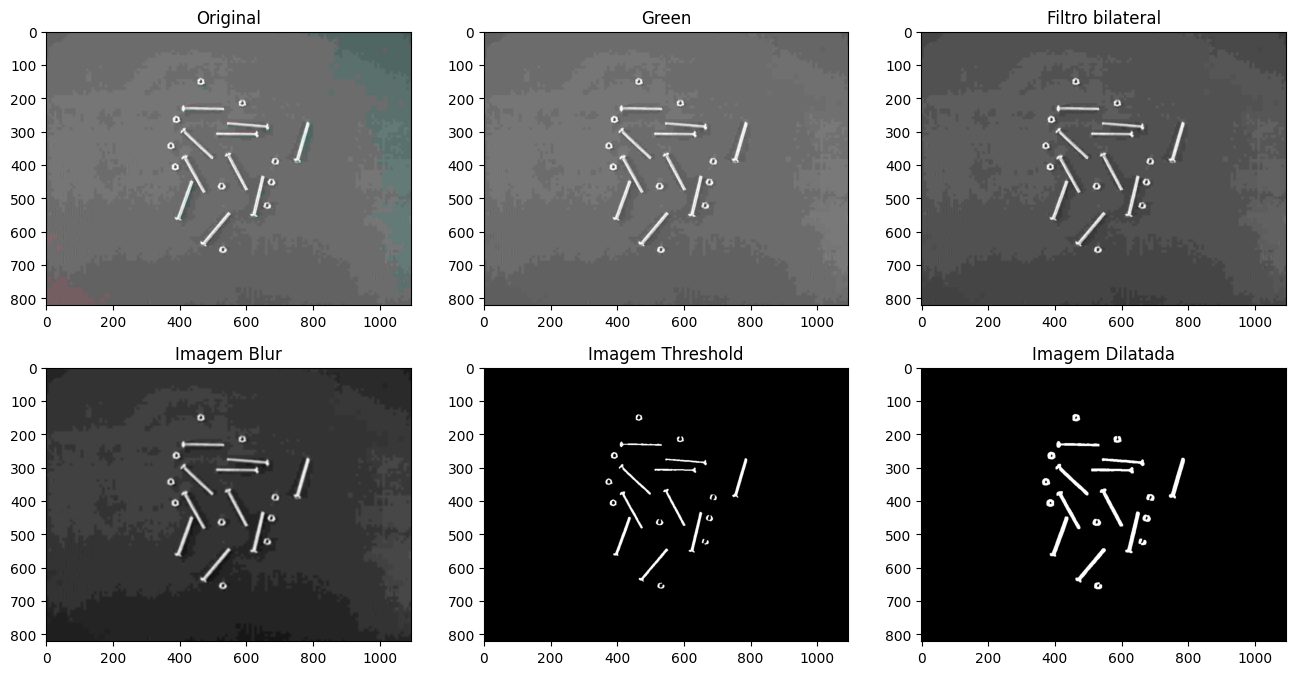

In [8]:
# Ler todas as imagens na pasta e plotar
for fn in img_names:

    areas = list()
    
    # Imagem de entrada
    img = cv2.imread(fn, 1)

    #Separar os canais de imagens
    B, G, R = cv2.split(img)

    #  Filtro bilateral e Blur - Redução de ruídos e melhora de bordas
    img_bil = cv2.bilateralFilter(G, 1, 90, 90)
    img_blur = cv2.blur(img_bil, (5,5))

    # Converter todos os pixels entre 1-195 para 0 e os outros para 1
    img_th = cv2.threshold(img_blur, 190, 255, cv2.THRESH_BINARY) [1]

    # Dilatar as imagens
    img_dilate = cv2.dilate(img_th, np.ones((4,4), np.uint8), iterations = 1)

plt.figure(figsize=(16, 8))
plt.subplot(2,3,1), plt.imshow(img,cmap = 'gray')
plt.title('Original')

plt.subplot(2,3,2), plt.imshow(G,cmap = 'gray')
plt.title('Green')

plt.subplot(2, 3, 3), plt.imshow(img_bil, cmap = 'gray')
plt.title('Filtro bilateral')

plt.subplot(2, 3, 4), plt.imshow(img_blur, cmap = 'gray')
plt.title('Imagem Blur')

plt.subplot(2, 3, 5), plt.imshow(img_th, cmap = 'gray')
plt.title('Imagem Threshold')

plt.subplot(2, 3, 6), plt.imshow(img_dilate, cmap = 'gray')
plt.title('Imagem Dilatada')

plt.show()



